In [1]:
from tfModel import *


INFO:tensorflow:Restoring parameters from ../models/RNN/my_RNN_model


In [9]:
#raw = Audio.getStream(sample_rate = 22050, chunk_size = 8192,chunk_num = 1, isWrite=True)
raw,sr = librosa.load('../data/drone170719-002.wav', sr=22050)
dataX = mfcc(raw).T
X_hot = makeHot(dataX,seq_length = seq_length)
print(X_hot.shape)
y_pred = sess.run(tf.argmax(Y_pred,1), feed_dict={X:X_hot, BatchSize: len(X_hot)})

(5073, 16, 13)


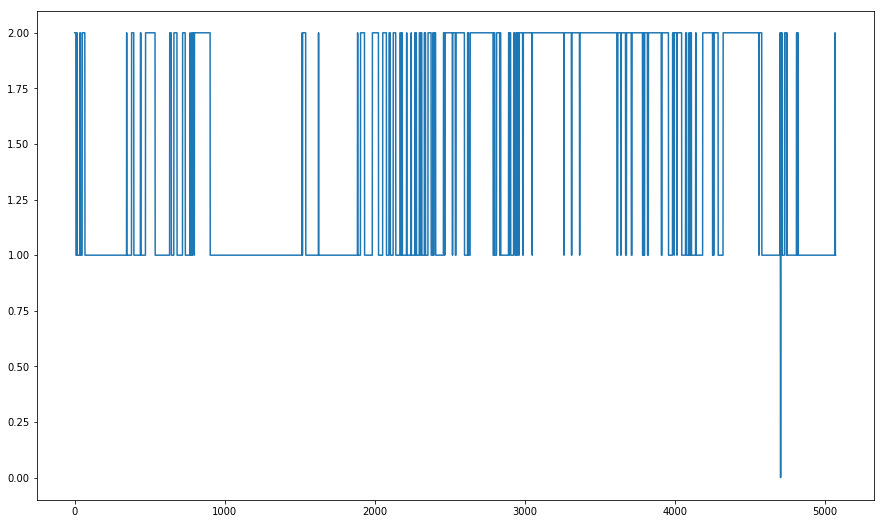

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(1,1,1)
ax.plot(np.linspace(0,len(y_pred), len(y_pred)),y_pred)

In [7]:
# 0: none 
# 1: load 
# 2: unloaded
while(True):
    raw = Audio.getStream(sample_rate = 22050, chunk_size = 8192,chunk_num = 2, isWrite=True)
    dataX = mfcc(raw).T
    X_hot_list= []
    #Y_hot = dataY[seq_length-1:].reshape(len(dataY[seq_length-1:]), 1)
    #Y_hot_tmp = dataY[seq_length-1:]

    for i in range(0, dataX.shape[0] - seq_length+1):
        _x = dataX[i:i + seq_length]
        #if i<10:
            #print(_x, "->", Y_hot_tmp[i])
        X_hot_list.append(_x)

    X_hot = np.array(X_hot_list[:])
    #Y_hot= Y_hot_tmp.reshape((len(Y_hot_tmp),n_unique_labels))
    print(X_hot.shape,end='')
    y_pred = sess.run(tf.argmax(Y_pred,1), feed_dict={X:X_hot, BatchSize: len(X_hot)})
    print('\t',y_pred)

time: 0.7756 	(19, 16, 13)	 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
time: 0.7768 	(19, 16, 13)	 [0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0]
time: 0.7765 	(19, 16, 13)	 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
time: 0.7750 	(19, 16, 13)	 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
time: 0.7749 	(19, 16, 13)	 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
time: 0.7760 	(19, 16, 13)	 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
time: 0.7764 	(19, 16, 13)	 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
time: 0.7756 	(19, 16, 13)	 [0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2]
time: 0.7757 	(19, 16, 13)	 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


KeyboardInterrupt: 